# Crime data from 2014

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2014

apr14.xls*  dec14.xls*  jan14.xls*  jun_ed_14.xls*  may14.xls*  oct14.xls*
aug14.xls*  feb14.xls*  jul14.xls*  mar14.xls*      nov14.xls*  sep14.xls*


In [3]:
path = 'data/2014'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,2014-04-28,5,Murder,13R,MCKINNEY,NaN,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,2014-04-27,18,Murder,20A,HILLMONT,NaN,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,2014-04-09,18,Murder,20A,RENWICK,NaN,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,2014-04-24,3,Murder,03B,RICHMOND,NaN,-,AVE


In [6]:
# get premise codes

pc = pd.read_csv('data/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.head()

,Premise,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of             114137
# Of Offenses     69536
# Offenses       111431
# offenses        70146
Beat                 16
Block Range       51761
BlockRange        70146
Date                  4
Hour                  0
Offense Type          0
Premise           29581
Street Name       51604
StreetName        70146
Suffix                0
Type                  0
dtype: int64

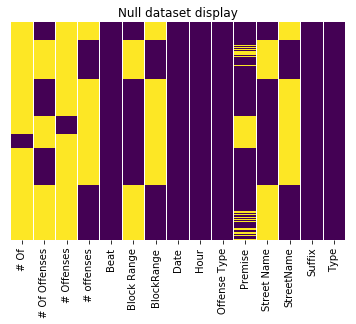

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [10]:
# 2014
# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

In [11]:
df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

In [12]:
df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
                              df['# Of Offenses'].dropna(),
                              df['# offenses'].dropna(),
                              df['# Offenses'].dropna()]).reindex_like(df)

In [13]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# Of           7613 non-null float64
NumOffenses    121750 non-null float64
# Offenses     10319 non-null float64
# offenses     51604 non-null float64
Beat           121734 non-null object
Block Range    69989 non-null object
BlockRange     121593 non-null object
Date           121746 non-null datetime64[ns]
Hour           121750 non-null int64
OffenseType    121750 non-null object
Premise        92169 non-null object
Street Name    70146 non-null object
StreetName     121750 non-null object
Suffix         121750 non-null object
Type           121750 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


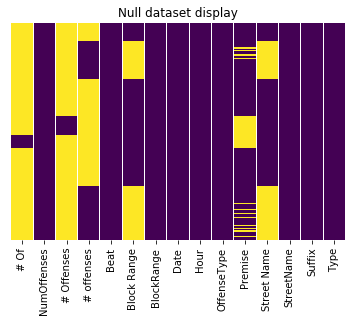

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [15]:
df.apply(lambda x: sum(x.isnull()))

# Of           114137
NumOffenses         0
# Offenses     111431
# offenses      70146
Beat               16
Block Range     51761
BlockRange        157
Date                4
Hour                0
OffenseType         0
Premise         29581
Street Name     51604
StreetName          0
Suffix              0
Type                0
dtype: int64

## Subset dataframe to work on 

In [16]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 8 columns):
Date           121746 non-null datetime64[ns]
Beat           121734 non-null object
BlockRange     121593 non-null object
StreetName     121750 non-null object
OffenseType    121750 non-null object
Premise        92169 non-null object
NumOffenses    121750 non-null float64
Hour           121750 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 7.4+ MB


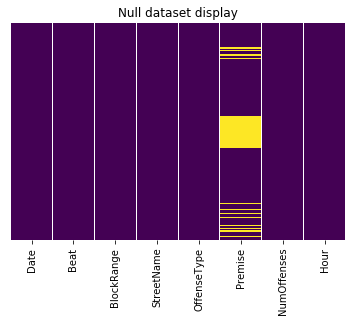

In [17]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Join datafames
 join premise df with crime to extract num values

In [18]:
crimes.Premise.value_counts(dropna=False)[:10]

NaN                          29581
20R                           6410
Residence or House            6384
20A                           6094
18A                           6072
Apartment                     4786
Apartment Parking Lot         4517
13R                           3836
Road, Street, or Sidewalk     3465
20D                           3222
Name: Premise, dtype: int64

In [19]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121754 entries, 0 to 121753
Data columns (total 9 columns):
Date                   121746 non-null datetime64[ns]
Beat                   121734 non-null object
BlockRange             121593 non-null object
StreetName             121750 non-null object
OffenseType            121750 non-null object
Premise                92173 non-null object
NumOffenses            121750 non-null float64
Hour                   121750 non-null float64
Premise Description    51699 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.3+ MB


In [20]:
crimes[['Premise', 'Premise Description']]

,Premise,Premise Description
0,18D,LAUNDRY/DRY CLEANERS PARKING LOT
1,18D,LAUNDRY/DRY CLEANERS PARKING LOT
2,18D,LAUNDRY/DRY CLEANERS PARKING LOT
3,18D,LAUNDRY/DRY CLEANERS PARKING LOT
4,18D,LAUNDRY/DRY CLEANERS PARKING LOT
5,18D,LAUNDRY/DRY CLEANERS PARKING LOT
6,18D,LAUNDRY/DRY CLEANERS PARKING LOT
7,18D,LAUNDRY/DRY CLEANERS PARKING LOT
8,18D,LAUNDRY/DRY CLEANERS PARKING LOT
9,18D,LAUNDRY/DRY CLEANERS PARKING LOT


In [21]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2014-04-19,14D30,8500-8599,MARTIN LUTHER KING,Murder,18D,1.0,17.0,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,3B10,4400-4499,SHERWOOD,Robbery,18D,1.0,2.0,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,16E30,5300-5399,OREM,Theft,18D,1.0,12.0,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,13D20,6600-6699,TELEPHONE,Theft,18D,1.0,11.0,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,8C50,8800-8899,TIDWELL,Theft,18D,1.0,15.0,LAUNDRY/DRY CLEANERS PARKING LOT


In [22]:
crimes.apply(lambda x: sum(x.isnull()))

Date                       8
Beat                      20
BlockRange               161
StreetName                 4
OffenseType                4
Premise                29581
NumOffenses                4
Hour                       4
Premise Description    70055
dtype: int64

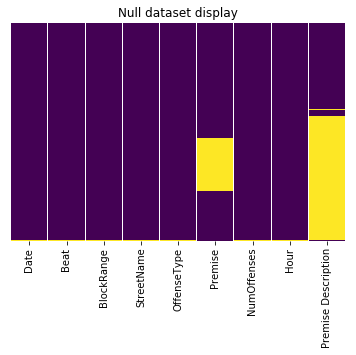

In [23]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [24]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
48535,2014-04-26,18F50,7400-7499,HARWIN,Robbery,---,1.0,4.0,NaN
48536,2014-04-23,19G50,9900-9999,BISSONNET,Robbery,---,1.0,20.0,NaN
48537,2014-04-25,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,12.0,NaN
48538,2014-04-23,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,20.0,NaN
48539,2014-04-02,12D20,12000-12099,BEAMER,Burglary,---,1.0,4.0,NaN


In [25]:
len(crimes[crimes['Premise'] == '---'])

492

In [26]:
len(crimes[crimes['Premise'] == 'N'])

18

In [27]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [28]:
len(crimes[crimes['Premise Description'].isnull()])

29581

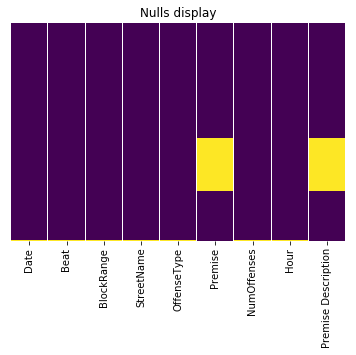

In [29]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [30]:
crimes.apply(lambda x: sum(x.isnull()))

Date                       8
Beat                      20
BlockRange               161
StreetName                 4
OffenseType                4
Premise                29581
NumOffenses                4
Hour                       4
Premise Description    29581
dtype: int64

## drop rows with 2 or 3 missing values

In [31]:
#crimes = crimes.dropna(thresh=3)
crimes = crimes.dropna(subset=['Date'])

In [32]:
crimes.apply(lambda x: sum(x.isnull()))

Date                       0
Beat                      16
BlockRange               157
StreetName                 0
OffenseType                0
Premise                29577
NumOffenses                0
Hour                       0
Premise Description    29577
dtype: int64

In [33]:
crimes = crimes.dropna(thresh=3)

In [34]:
crimes.apply(lambda x: sum(x.isnull()))

Date                       0
Beat                      16
BlockRange               157
StreetName                 0
OffenseType                0
Premise                29577
NumOffenses                0
Hour                       0
Premise Description    29577
dtype: int64

# FIND NAN

## Find NaN
- drop if > 2 nan

In [35]:
crimes.apply(lambda x: sum(x.isnull()))

Date                       0
Beat                      16
BlockRange               157
StreetName                 0
OffenseType                0
Premise                29577
NumOffenses                0
Hour                       0
Premise Description    29577
dtype: int64

In [36]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
64732,2014-08-08,10H10,5300-5399,HARRISBURG,Aggravated Assault,NaN,1.0,18.0,NaN
64733,2014-08-23,10H10,UNK,ENNIS,Theft,NaN,1.0,0.0,NaN
64734,2014-08-25,10H10,100-199,LOCKWOOD,Theft,NaN,1.0,12.0,NaN
64735,2014-08-02,10H10,200-299,ROBERTS,Theft,NaN,1.0,18.0,NaN
64736,2014-07-27,10H10,3900-3999,BERING,Aggravated Assault,NaN,1.0,15.0,NaN


## Problem
- find nan values and fix

In [37]:
null_premise = crimes.Premise.isnull()

In [38]:
crimes['Premise'] = crimes["Premise"].fillna('none')

In [39]:
crimes['Premise Description'] = crimes["Premise Description"].fillna('none')

In [40]:
crimes.apply(lambda x: sum(x.isnull()))

Date                     0
Beat                    16
BlockRange             157
StreetName               0
OffenseType              0
Premise                  0
NumOffenses              0
Hour                     0
Premise Description      0
dtype: int64

## Inspect each column

In [41]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat column
- total beats should be around 120

In [42]:
len(crimes.Beat.value_counts())

234

In [43]:
len(crimes.Beat.value_counts(dropna=False))

235

In [44]:
crimes.Beat.unique()[:10]

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20'], dtype=object)

In [45]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [46]:
len(crimes.Beat.value_counts(dropna=False))

235

In [47]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [48]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

124

In [49]:
crimes.Beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [50]:
crimes.Beat.value_counts(dropna=False).head()

19G10    2667
1A20     2606
6B60     2547
13D20    2460
1A10     2454
Name: Beat, dtype: int64

## BlockRange

In [51]:
len(crimes.BlockRange.value_counts(dropna=False))

251

In [52]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1880
2300-2399    1671
900-999      1636
1000-1099    1415
4400-4499    1412
Name: BlockRange, dtype: int64

In [53]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [54]:
len(crimes.BlockRange.value_counts(dropna=False))

251

## StreetName

In [55]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7970


In [56]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [57]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7966


In [58]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer    3458
north         1790
gulf          1756
gessner       1680
richmond      1628
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [59]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [60]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [61]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [62]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66673
Burglary              21144
Auto Theft            13454
Robbery                9997
Aggravated Assault     9460
Rape                    788
Murder                  230
Name: OffenseType, dtype: int64


In [63]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [64]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [65]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66673
Burglary              21144
Auto Theft            13454
Robbery                9997
Aggravated Assault     9460
Rape                    788
Murder                  230
Name: OffenseType, dtype: int64


## Premise

In [66]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

crimes['Premise Description'] = crimes['Premise Description'].str.strip()

crimes['Premise Description'] = crimes['Premise Description'].str.lower()

before:251


In [67]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:251


In [68]:
crimes.Premise.value_counts(dropna=False).head()

none                  29577
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

# Date column

In [69]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Date
- make datetime index

In [70]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [71]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,Restaurant or Cafeteria,1.0,7.0,restaurant or cafeteria
1914-11-02,18F60,8800-8899,bellaire,Burglary,Miscellaneous Business (Non-Specific),1.0,3.0,miscellaneous business (non-specific)
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,none
1920-06-28,17E40,12100-12199,fairmeadow,Theft,none,1.0,16.0,none
1924-12-09,UNK,11000-11099,eastex,Theft,Strip Business Center Parking Lot,1.0,11.0,strip business center parking lot


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [72]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [73]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,Restaurant or Cafeteria,1.0,7.0,restaurant or cafeteria,08,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,bellaire,Burglary,Miscellaneous Business (Non-Specific),1.0,3.0,miscellaneous business (non-specific),02,Monday,Nov,1914
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,none,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,fairmeadow,Theft,none,1.0,16.0,none,28,Monday,Jun,1920
1924-12-09,UNK,11000-11099,eastex,Theft,Strip Business Center Parking Lot,1.0,11.0,strip business center parking lot,09,Tuesday,Dec,1924


In [74]:
crimes.year.value_counts(dropna=False)

2014    120520
2013      1052
2012        53
2011        25
2009        14
2010        13
2006        11
2008         9
2003         9
2004         7
2005         5
2007         5
2001         4
1914         3
2000         3
2002         3
1987         1
1999         1
1992         1
1984         1
1980         1
1920         1
1971         1
1973         1
2019         1
1924         1
Name: year, dtype: int64

We can see now that many reports have incorect year

## null values

- check
- count
- display

In [75]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [76]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [77]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [78]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [79]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,restaurant or cafeteria,1.0,7.0,08,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,bellaire,Burglary,miscellaneous business (non-specific),1.0,3.0,02,Monday,Nov,1914
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,fairmeadow,Theft,none,1.0,16.0,28,Monday,Jun,1920
1924-12-09,UNK,11000-11099,eastex,Theft,strip business center parking lot,1.0,11.0,09,Tuesday,Dec,1924


In [80]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [81]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)


In [82]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,restaurant or cafeteria,1.0,7.0,08,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,bellaire,Burglary,miscellaneous business (non-specific),1.0,3.0,02,Monday,Nov,1914
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,fairmeadow,Theft,none,1.0,16.0,28,Monday,Jun,1920
1924-12-09,UNK,11000-11099,eastex,Theft,strip business center parking lot,1.0,11.0,09,Tuesday,Dec,1924


## Save

In [83]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121746 entries, 1914-09-08 to 2019-12-25
Data columns (total 11 columns):
Beat           121746 non-null object
BlockRange     121746 non-null object
StreetName     121746 non-null object
OffenseType    121746 non-null object
Premise        121746 non-null object
NumOffenses    121746 non-null float64
Hour           121746 non-null float64
day            121746 non-null object
weekday        121746 non-null object
month          121746 non-null object
year           121746 non-null object
dtypes: float64(2), object(9)
memory usage: 11.1+ MB


In [84]:
crime_yr.to_csv('data/clean/crime14_clean.csv')

In [85]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
